# Problem Statement-

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [69]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [70]:
#Read excel sheet and convert into Dataframe
data=pd.read_csv(r'D:\DataTrained\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# 
Observation-

The features in the above data set are-

- Age     

- BusinessTravel   

- DailyRate 

- Department 

- DistanceFromHome 

- Education

- EducationField

- EnvironmentSatisfaction

- Gender

- HourlyRate

- JobInvolvement

- JobLevel

- JobRole

- JobSatisfaction

- MaritalStatus

- MonthlyIncome

- MonthlyRate

- NumCompaniesWorked

- OverTime

- PercentSalaryHike

- PerformanceRating

- PerformanceRating

- StandardHours

- StockOptionLevel

- TotalWorkingYears

- TrainingTimesLastYear

- WorkLifeBalance

- YearsAtCompany

- YearsInCurrentRole

- YearsSinceLastPromotion

- YearsWithCurrManager
 
The label in the given dataset is-

- Attrition  

The columns not required-

- EmployeeCount      
         - As the entire column consist of one value (i.e. 1)
- EmployeeNumber
         - All employees have a unique employee number
- StandardHours 
         - All employees have the same standardhours (i.e., 80)
- Over18
         - All employees are above 18

In [71]:
#dropping unwanted columns
data=data.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

In [72]:
#shape of file
data.shape

(1470, 31)

In [73]:
# Checking for data types of the columns
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

# 
As there are object datatypes, we will apply encoding techniques

In [74]:
# Checking for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [75]:
# Checking for null values in object datatype columns

for column in data:
    data[column]=data[column].replace(" ",np.nan)

In [76]:
# Checking for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# 
There are no null values

# Visualization of the Data and Encoding object data

<AxesSubplot:ylabel='Frequency'>

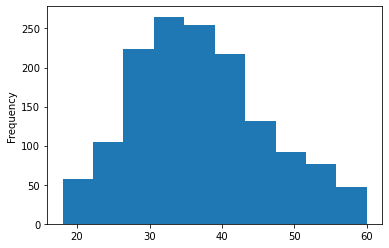

In [77]:
data.Age.plot(kind='hist')

# 
Majority of the employees belong to the age group of 30-40 years

No     1233
Yes     237
Name: Attrition, dtype: int64


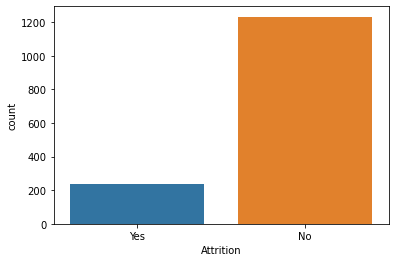

In [78]:
ax=sns.countplot(x="Attrition", data=data)
print(data["Attrition"].value_counts())

# 
1233 employees have not been attrited, 237 employees have been attrited

In [79]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Attrition"])
data["Attrition"]=df

# 
The data is encoded as follows-

- 0- No
- 1- Yes

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


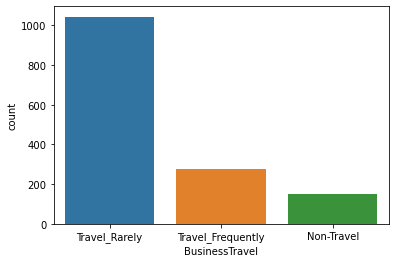

In [80]:
ax=sns.countplot(x="BusinessTravel", data=data)
print(data["BusinessTravel"].value_counts())

# 
1043 employees travel rarely, 277 employees travel frequently and 150 employees are non-travelers

In [81]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["BusinessTravel"])
data["BusinessTravel"]=df

# 
The data is encoded as follows-

- 0- Non traveler
- 1- Travel frequently
- 2- Travel rarely

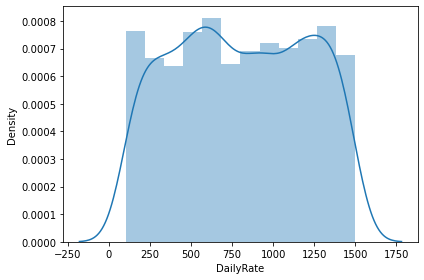

In [82]:
sns.distplot(data["DailyRate"])
plt.xlabel("DailyRate",fontsize=10)
plt.tight_layout()

# 
The data is slightly skewed

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


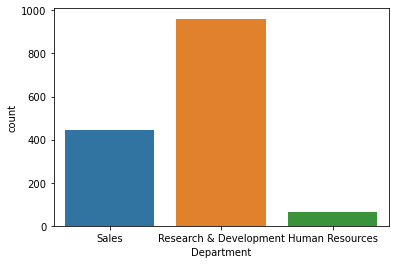

In [83]:
ax=sns.countplot(x="Department", data=data)
print(data["Department"].value_counts())

#
961 employees belong to Research and Development, 446 belong to Sales and 63 belong to Human Resources

In [84]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Department"])
data["Department"]=df

# 
The data is encodes as-

- 0 - Human Resources
- 1 - Reseach and Development
- 2 - Sales

<AxesSubplot:ylabel='Frequency'>

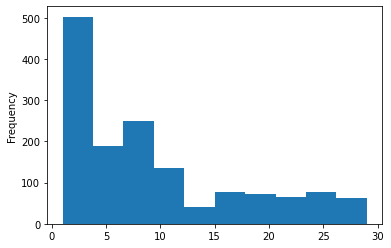

In [85]:
data.DistanceFromHome.plot(kind='hist')

# 
Majority of the employees live close by to the office

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


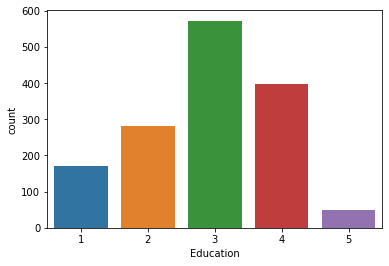

In [86]:
ax=sns.countplot(x="Education", data=data)
print(data["Education"].value_counts())

# 
572 employees have education  3, 398 employees have education of 4 , 282 employees have education of 2, 170 employees have education of 1, 48 employees have education of 5

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


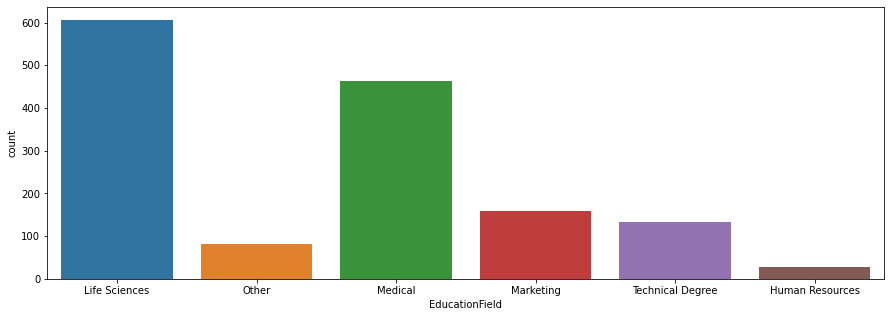

In [87]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="EducationField", data=data)
print(data["EducationField"].value_counts())

# 
606 employees have been educated in Life Sciences, 464 employees have been educated in Medical, 159 employees have been educated in Marketing, 132 employees have Technical Degree, 82 employees have been educated in other field, 27 employees have been educated in HUman Resources

In [88]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["EducationField"])
data["EducationField"]=df

# 
The data is encodes as-

- 0 - Human Resources
- 1 - Life Sciences
- 2 - Marketing
- 3 - Medical
- 4 - Other
- 5 - Technical Degree

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


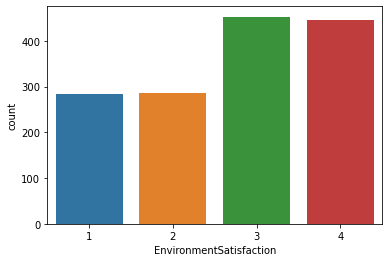

In [89]:
ax=sns.countplot(x="EnvironmentSatisfaction", data=data)
print(data["EnvironmentSatisfaction"].value_counts())

# 
Assuming 1 being the lowest and 4 being the highest-

453 employees are satisfied with the environment, 446 are highly satisfied with the environment, 287 employees are moderately satisfied with the environment and 284 are not satisfied with the environment

Male      882
Female    588
Name: Gender, dtype: int64


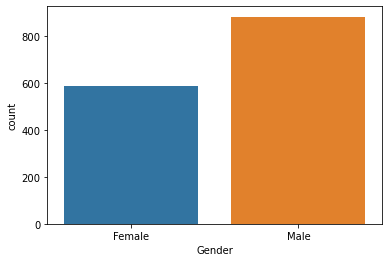

In [90]:
ax=sns.countplot(x="Gender", data=data)
print(data["Gender"].value_counts())

# 
882 employees are males and 588 are females

In [91]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Gender"])
data["Gender"]=df

# 
The data is encoded as follows-
- 0 - Female
- 1 - Male

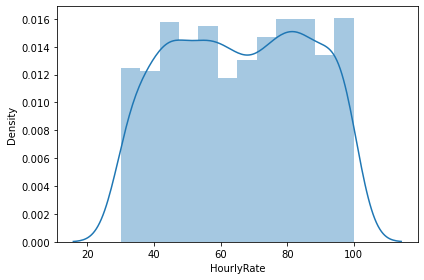

In [92]:
sns.distplot(data["HourlyRate"])
plt.xlabel("HourlyRate",fontsize=10)
plt.tight_layout()

# 
The data seems slightly skewed

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


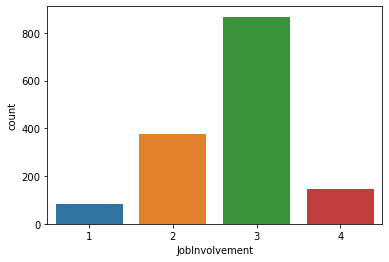

In [93]:
ax=sns.countplot(x="JobInvolvement", data=data)
print(data["JobInvolvement"].value_counts())

# 
Assuming 1 to be least and 4 as the highest-

868 employees consider their job involving, 375 consider their job moderately involving, 144 consider their job highly involving and 83 consider their job non-invloving

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


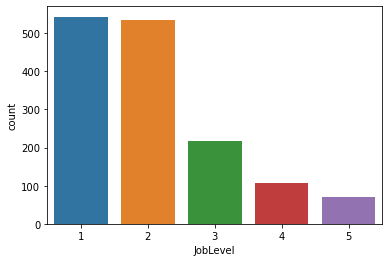

In [94]:
ax=sns.countplot(x="JobLevel", data=data)
print(data["JobLevel"].value_counts())

# 
Assuming 1 to be lowest and 5 the highest-

543 employees are at junior level, 534 are at intermediate level, 218 employees are senior employees, 106 are managers and 69 are team leads

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


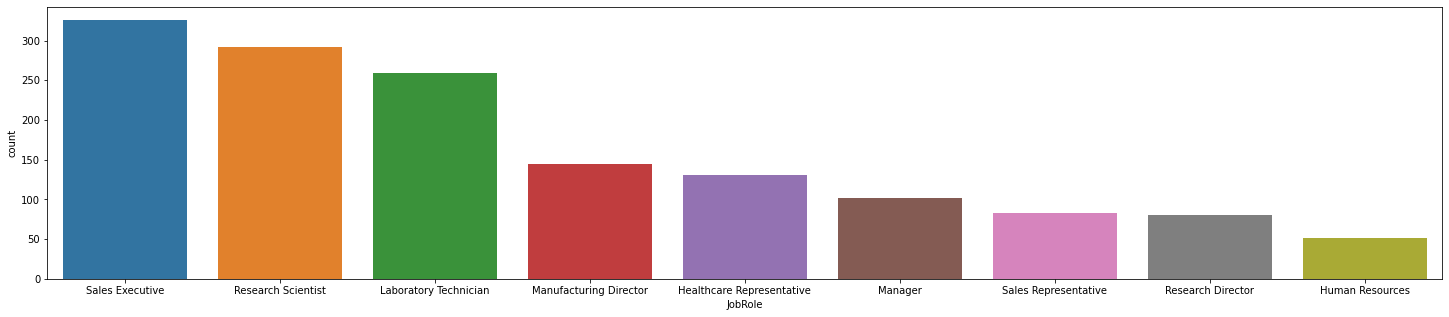

In [95]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="JobRole", data=data)
print(data["JobRole"].value_counts())

# 
326 employees are Sales Executive, 292 are Research Scientist, 259 are Laboratory Technician, 145 are Manufacturing Director, 131 are Healthcare Representative, 102 are Manager, 83 are Sales Representative, 80 are Research Director 52 are Human Resources

In [96]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["JobRole"])
data["JobRole"]=df

# 
The data is encoded as-

- 0 - Healthcare Represntative
- 1 - Human Resources
- 2 - Laboratory Technician
- 3 - Manager
- 4 - Manufacturing Director
- 5 - Research Director
- 6 - Research Scientist
- 7 - Sales executive

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


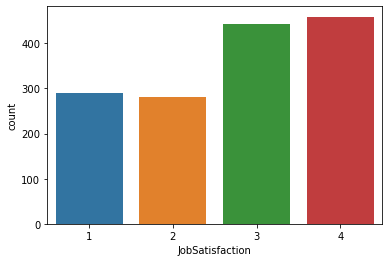

In [97]:
ax=sns.countplot(x="JobSatisfaction", data=data)
print(data["JobSatisfaction"].value_counts())

# 
Assuming 1 to be least and 4 to be highest-

459 employees are highly satisfied with their jobs, 442 employees are satisfied with their jobs, 289 employees are not satisfied with their job and 280 employees are moderately satisfied with their job

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


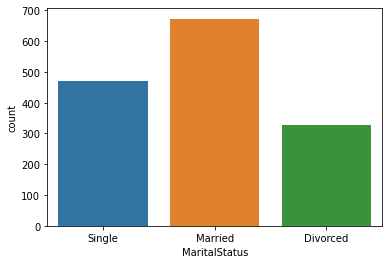

In [98]:
ax=sns.countplot(x="MaritalStatus", data=data)
print(data["MaritalStatus"].value_counts())

# 
673 employees are married, 470 employees are single and 327 employees are divorced

In [99]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["MaritalStatus"])
data["MaritalStatus"]=df


The data is encoded as follows-

- 0 - Divorced
- 1 - Married
- 2 - Single

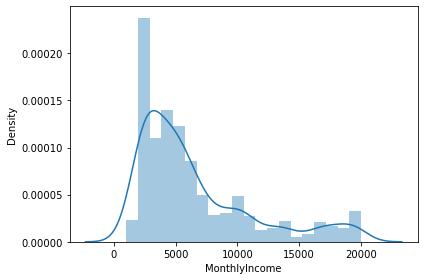

In [100]:
sns.distplot(data["MonthlyIncome"])
plt.xlabel("MonthlyIncome",fontsize=10)
plt.tight_layout()

# 
The data is skewed

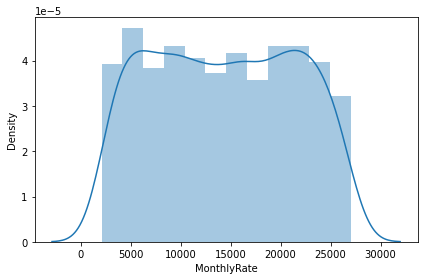

In [101]:
sns.distplot(data["MonthlyRate"])
plt.xlabel("MonthlyRate",fontsize=10)
plt.tight_layout()

# 
The data looks skewed

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


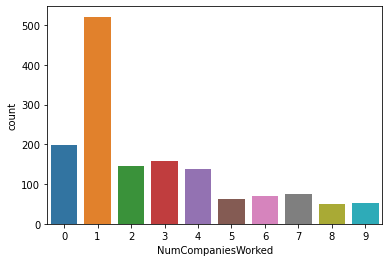

In [102]:
ax=sns.countplot(x="NumCompaniesWorked", data=data)
print(data["NumCompaniesWorked"].value_counts())

# 
521 employees have worked for 1 company, 197 employees have not worked for any company, 159 employees have worked for 3 companies, 146 employees have worked for 2 companies, 139 employees have worked for 4 companies, 74 employees have worked for 7 companies, 70 employees have worked for 6 companies, 63 employees have worked for 5 companies, 52 employees have worked for 9 companies, 49 employees have worked for 8 companies

No     1054
Yes     416
Name: OverTime, dtype: int64


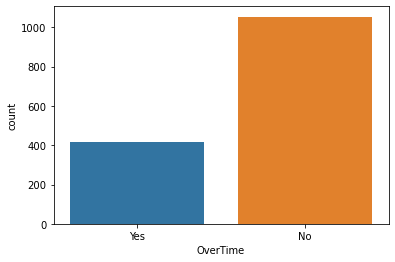

In [103]:
ax=sns.countplot(x="OverTime", data=data)
print(data["OverTime"].value_counts())

# 
1054 employees have not worked overtime, 416 employees have worked overtime

In [104]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["OverTime"])
data["OverTime"]=df


The data is encoded as-

- 0 - No
- 1 - Yes

<AxesSubplot:ylabel='Frequency'>

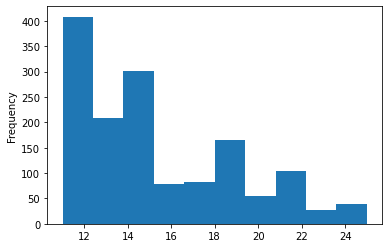

In [105]:
data.PercentSalaryHike.plot(kind='hist')

# 
Majority employees have obtained a salary hike of 10-12%

3    1244
4     226
Name: PerformanceRating, dtype: int64


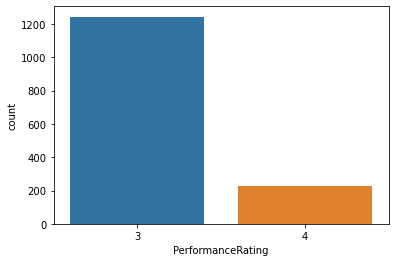

In [106]:
ax=sns.countplot(x="PerformanceRating", data=data)
print(data["PerformanceRating"].value_counts())

# 
1244 employees have a performance rating of 3, 226 employees have a performance rating of 4

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


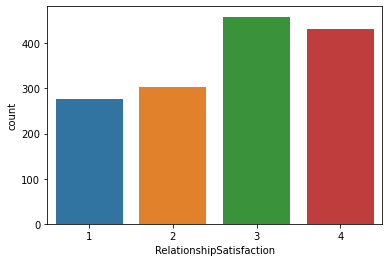

In [107]:
ax=sns.countplot(x="RelationshipSatisfaction", data=data)
print(data["RelationshipSatisfaction"].value_counts())

# 
Assuming 1 to be least and 4 to be highest-

459 employees are satisfied with their relationship, 432 employees are highly satisfied with their relationship, 303 employees are moderately satisfied with their relationship and 276 employees are not satisfied with their relationship

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


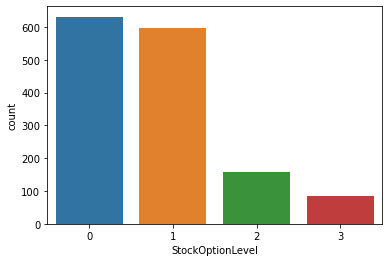

In [108]:
ax=sns.countplot(x="StockOptionLevel", data=data)
print(data["StockOptionLevel"].value_counts())

<AxesSubplot:ylabel='Frequency'>

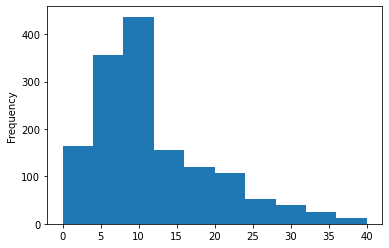

In [109]:
data.TotalWorkingYears.plot(kind='hist')

# 
Majority of the employees have worked for 8-12 years

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


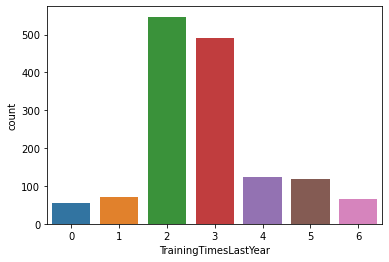

In [110]:
ax=sns.countplot(x="TrainingTimesLastYear", data=data)
print(data["TrainingTimesLastYear"].value_counts())

# 
547 employees have undergoone training 2 times last year, 491 employees have undergoone training 3 times last year, 123 employees have undergoone training 4 times last year, 119 employees have undergoone training 5 times last year, 71 employees have undergoone training 1 time last year65 employees have undergoone training 6 times last year, 54 employees have not undergoone training last year, 

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


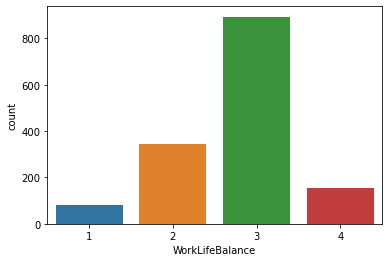

In [111]:
ax=sns.countplot(x="WorkLifeBalance", data=data)
print(data["WorkLifeBalance"].value_counts())

# 
Assuming 1 to be least and 4 to be highest-

893 employees have good worklife balance, 344 have average worklife balance, 153 have very good worklife balance and 80 are unhappy with their worklife balance

<AxesSubplot:ylabel='Frequency'>

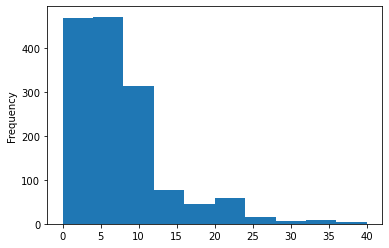

In [112]:
data.YearsAtCompany.plot(kind='hist')

# 
Majority of the employees are 0-7 years old in the company

<AxesSubplot:ylabel='Frequency'>

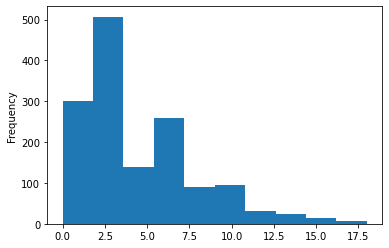

In [113]:
data.YearsInCurrentRole.plot(kind='hist')

# 
Majority of the employess are 2-3 years old in their current role

<AxesSubplot:ylabel='Frequency'>

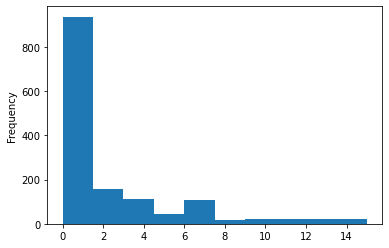

In [114]:
data.YearsSinceLastPromotion.plot(kind='hist')

# 
Majority of the employees got their propmotion 0-1 year back

<AxesSubplot:ylabel='Frequency'>

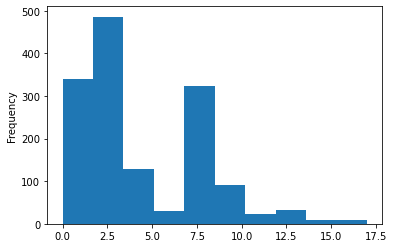

In [115]:
data.YearsWithCurrManager.plot(kind='hist')

# 
Majority of the employees are with their current manager since last 2-3 years

In [116]:
 # Checking for data types of the columns
data.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

# 
All data is converted into numeric form

In [117]:
#Statistical Analysis
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Checking Correlation

In [118]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


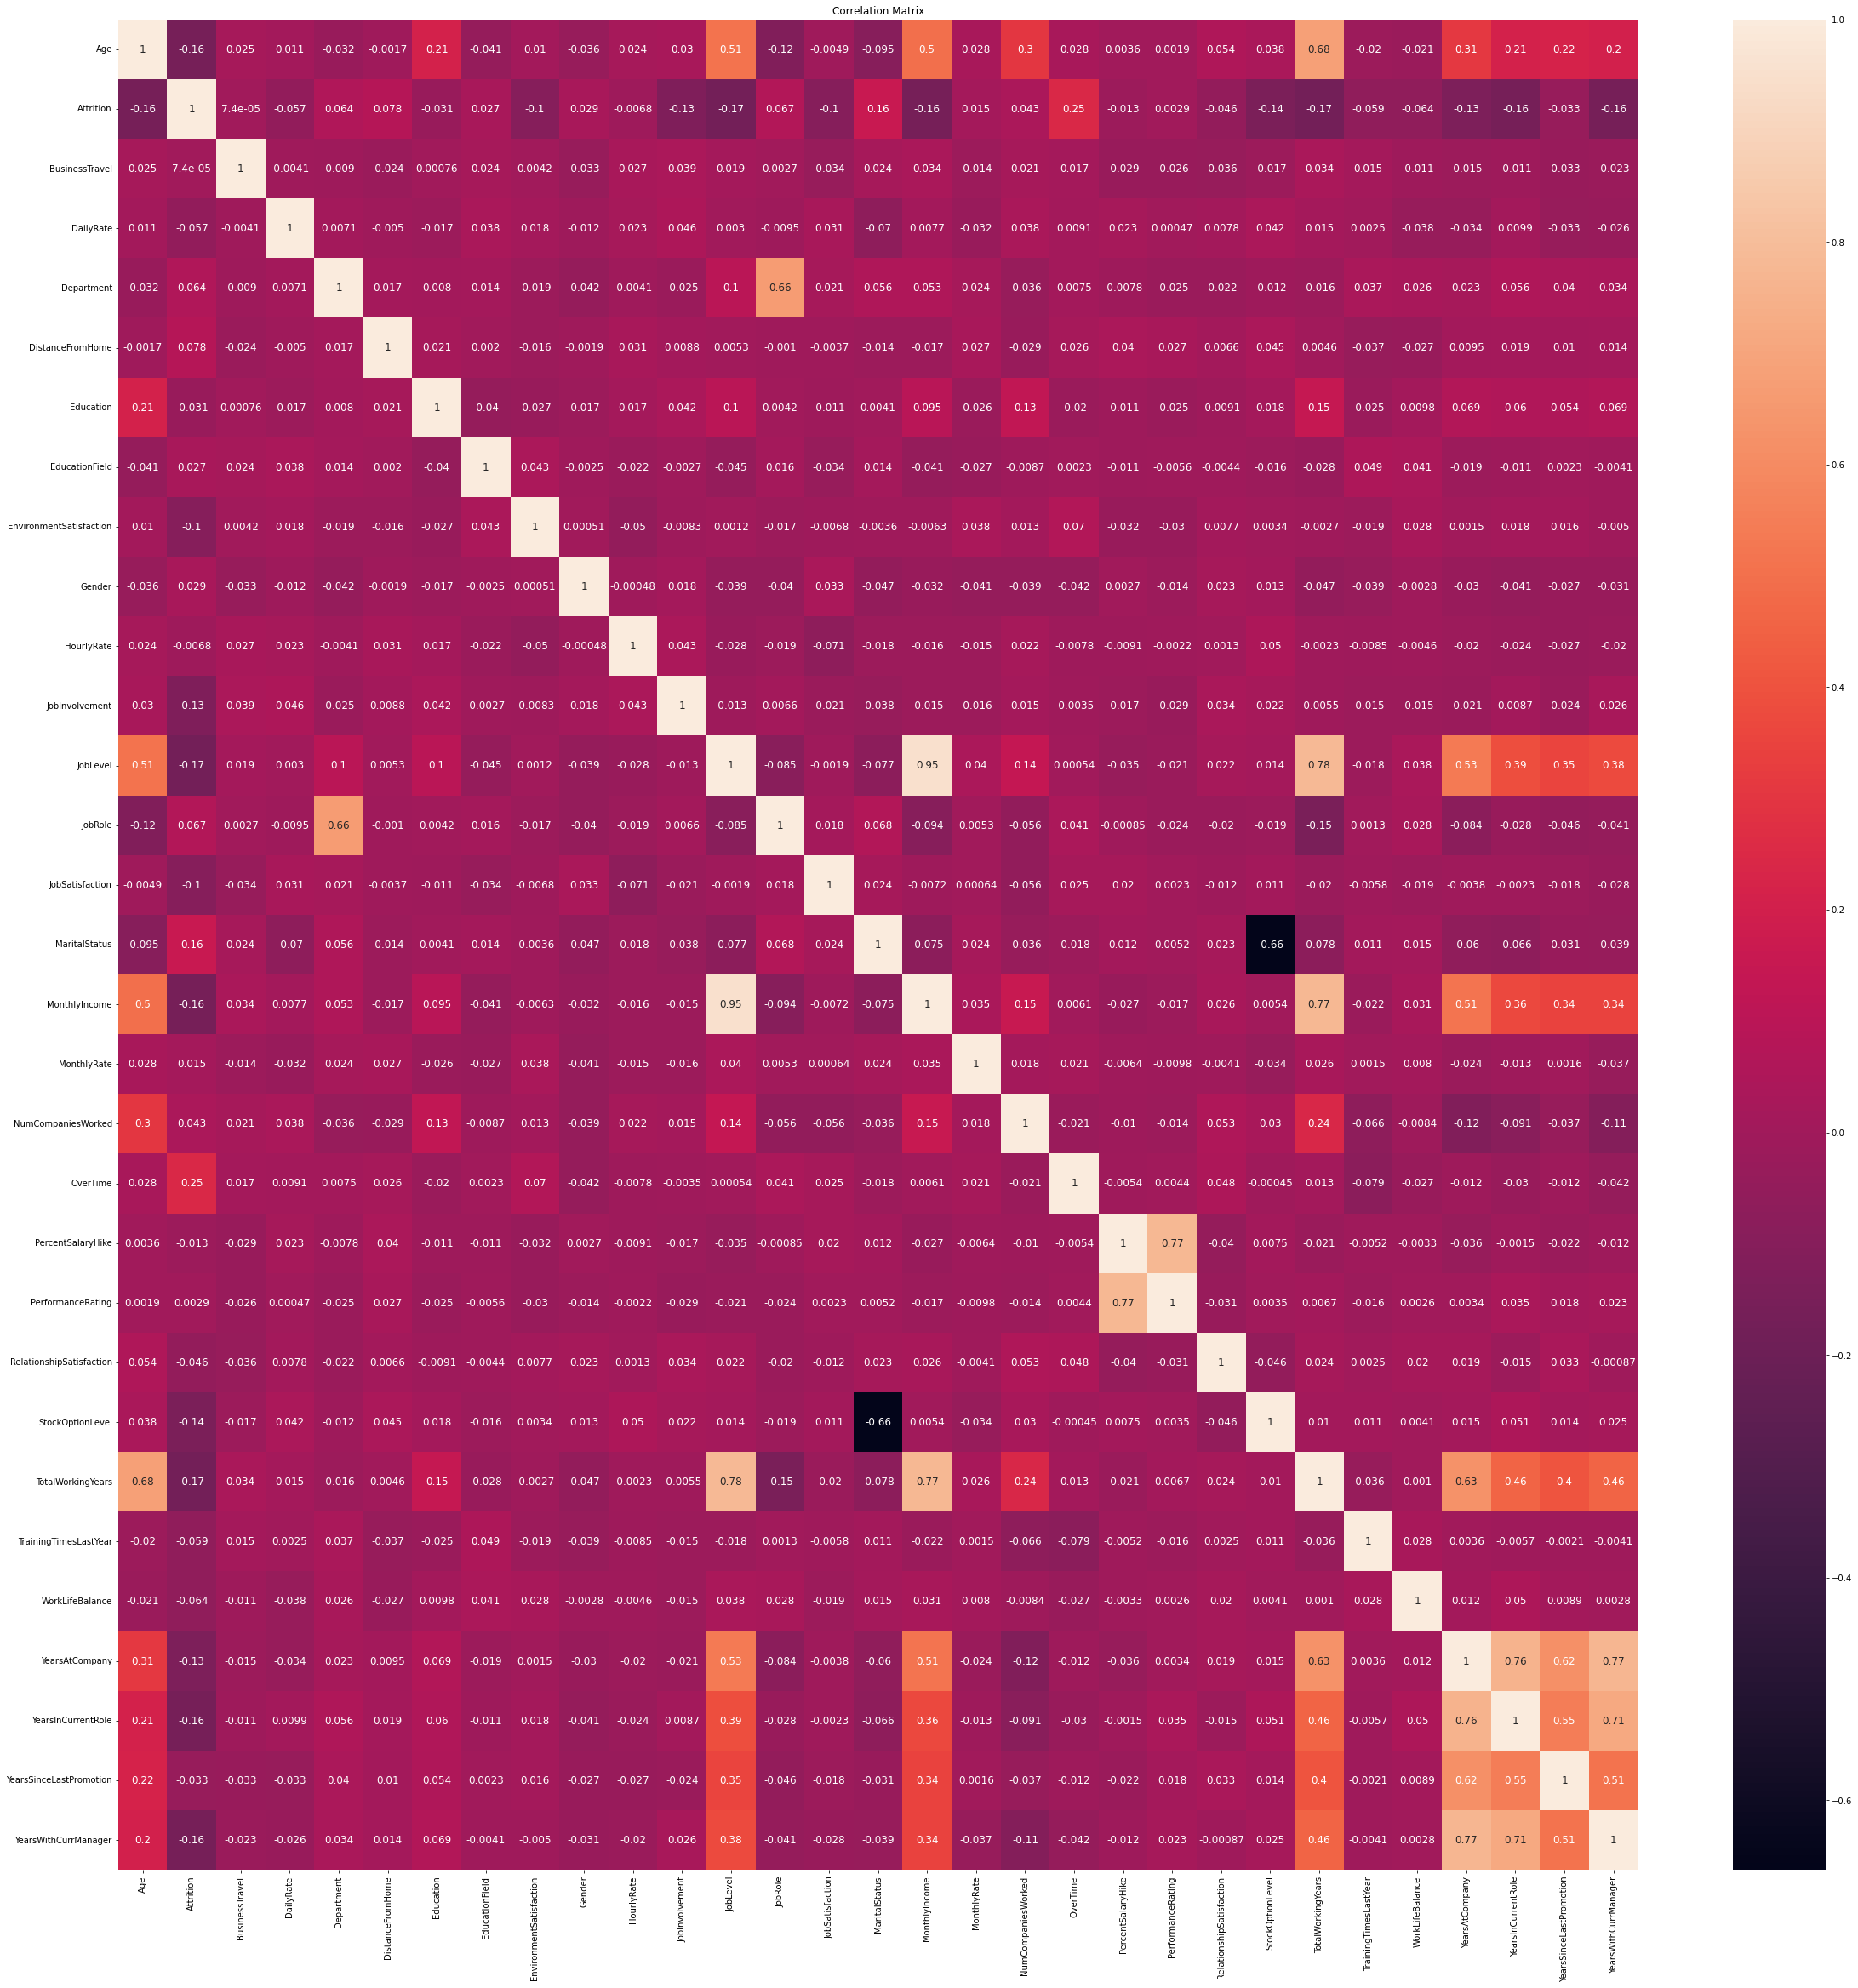

In [119]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[40,40])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

# Observation-

# 
Let's print the correlation values of independent values with target variable for a better understanding

In [120]:
#Let's print the correlation coefficient for the Prediction with churn

corr_matrix=data.corr()
corr_matrix["Attrition"].sort_values(ascending=True)

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

# Observation-
- TotalWorkingYears, JobLevel, YearsInCurrentRole, MonthlyIncome, Incident_Date, Age, YearsWithCurrManager, StockOptionLevel, YearsAtCompany, JobInvolvement, JobSatisfaction, EnvironmentSatisfaction, WorkLifeBalance, TrainingTimesLastYear, DailyRate, RelationshipSatisfaction, YearsSinceLastPromotion, Education, PercentSalaryHike and HourlyRate are negatively correlated to the label Attrition
- BusinessTravel, PerformanceRating, MonthlyRate, EducationField, Gender, NumCompaniesWorked, Department, JobRole, DistanceFromHome, MaritalStatus, and  OverTime  are positively correlated to the label Attrition
- TotalWorkingYears are 17% negatively correlated to the label Attrition  showing a moderately weak bond
- HourlyRate is 0.6% negatively correlated with Attrition showing an extremely weak bond
- BusinessTravel is 0.007% positively correlated with Attrition showing an extremely weak bond
- OverTime is 24% positively correlated with Attrition showing an moderately weak bond

In [121]:
data.shape

(1470, 31)

# Checking for outliers

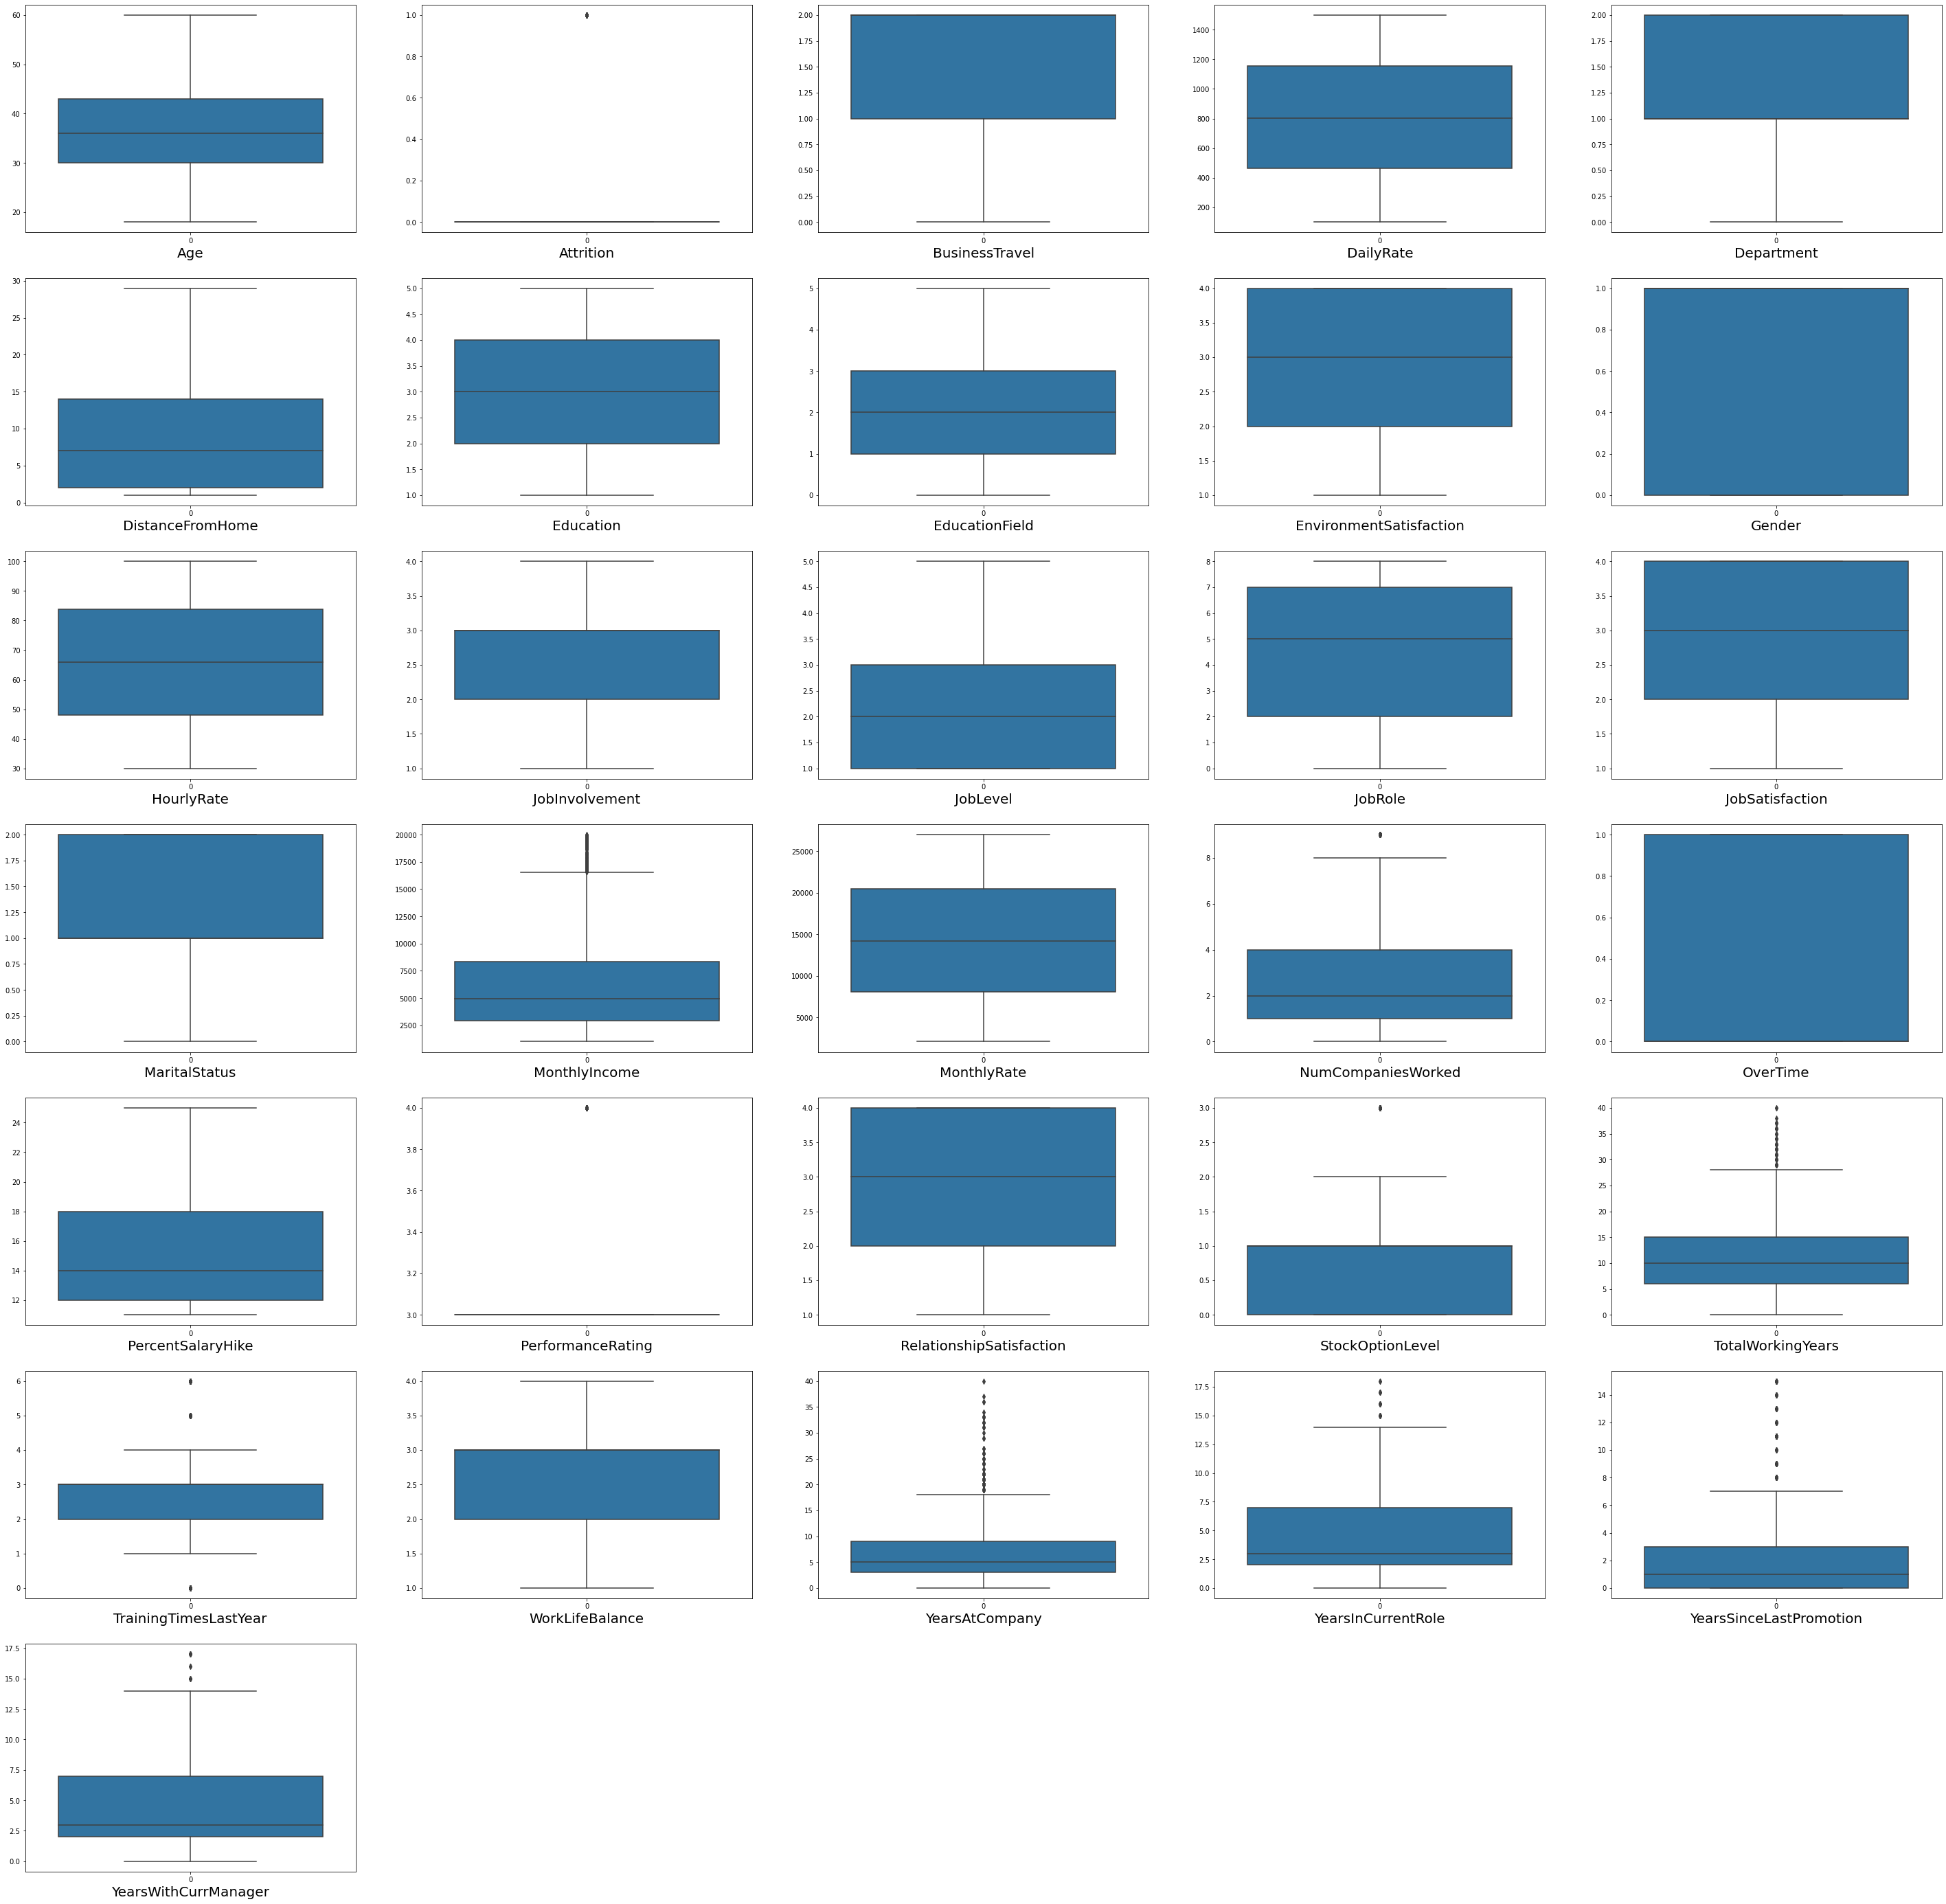

In [124]:
#visulaize the outliers using boxplot
plt.figure(figsize=(50,50))
graph=1

for column in data:
    if graph<=31:
        ax=plt.subplot(7,5,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features containing outliers-

- MonthyIncome
- NumCompaniesWorked
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

In [125]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(1470, 31)

In [126]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [127]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(1470, 31)
(1387, 31)


# 
As data loss is 5.6%, the outlier removal is considered

# Divide Data Set into features and labels

In [128]:
y=data_new['Attrition']
x=data_new.drop(columns=['Attrition'])

In [129]:
#Confirming the skewness
x.skew().sort_values(ascending=False)

PerformanceRating           1.931566
YearsSinceLastPromotion     1.756335
MonthlyIncome               1.544770
YearsAtCompany              1.248623
JobLevel                    1.126075
NumCompaniesWorked          1.037715
TotalWorkingYears           1.034487
StockOptionLevel            0.962332
DistanceFromHome            0.954752
OverTime                    0.954751
PercentSalaryHike           0.800592
YearsInCurrentRole          0.726675
YearsWithCurrManager        0.694506
TrainingTimesLastYear       0.577614
EducationField              0.544868
Age                         0.472280
Department                  0.183919
MonthlyRate                 0.030596
DailyRate                  -0.017078
HourlyRate                 -0.030481
MaritalStatus              -0.160952
Education                  -0.289024
RelationshipSatisfaction   -0.295686
EnvironmentSatisfaction    -0.325285
JobSatisfaction            -0.345612
JobRole                    -0.386843
Gender                     -0.417296
J

# 
Keeping +/-1.0 as the range of skewness, the columns not falling in this range are-

- PerformanceRating    
- YearsSinceLastPromotion      
- MonthlyIncome
- YearsAtCompany
- JobLevel 
- NumCompaniesWorked
- TotalWorkingYears
- BusinessTravel        

# Transforming Data to remove skewness

In [130]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [131]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

OverTime                    0.954751
YearsSinceLastPromotion     0.212301
PercentSalaryHike           0.112128
JobLevel                    0.110769
StockOptionLevel            0.089929
TrainingTimesLastYear       0.057949
MonthlyIncome               0.027700
NumCompaniesWorked          0.016175
Department                  0.015095
PerformanceRating           0.000000
Age                        -0.004079
DistanceFromHome           -0.008149
EducationField             -0.008642
TotalWorkingYears          -0.009666
WorkLifeBalance            -0.011133
JobInvolvement             -0.018801
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsWithCurrManager       -0.070570
Education                  -0.103747
HourlyRate                 -0.105678
MaritalStatus              -0.158253
MonthlyRate                -0.176560
RelationshipSatisfaction   -0.191406
DailyRate                  -0.199742
EnvironmentSatisfaction    -0.205472
JobSatisfaction            -0.217730
J

# Scaling the data

In [132]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# 
As there are too many features not having significant correlation with the label, PCA is applied

# Applying PCA (Principal Component Analysis)

In [133]:
from sklearn.decomposition import PCA

In [134]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-4.34290967e-01,  5.48056919e-01, -2.30852532e+00, ...,
         1.44647494e-01,  8.67238650e-02,  5.49854729e-16],
       [-1.48790033e+00, -8.23965086e-01,  4.59014678e-01, ...,
         8.46121481e-02,  1.30176868e-01, -4.85157007e-16],
       [ 3.47443524e+00,  1.69466158e+00, -3.39364347e-01, ...,
        -4.19454700e-01,  2.95918475e-01,  1.24858998e-16],
       ...,
       [ 5.80372353e-01,  1.97137831e-01,  8.72384533e-01, ...,
         3.96760706e-01, -8.49835052e-03, -2.90158321e-17],
       [-1.65838348e+00, -2.36817840e-01, -1.35311655e+00, ...,
        -2.31448319e-01,  2.75286773e-02,  1.73872044e-17],
       [ 3.65604423e-01,  5.71314446e-02,  2.88419320e-01, ...,
         6.11246020e-02,  3.44174738e-01, -4.19398310e-17]])

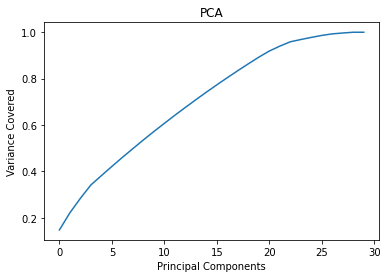

In [135]:
#Lets plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

# 
Around 20 principal components are able to explain >95% variance

In [136]:
pca=PCA(n_components=20)

In [137]:
new_pcomp=pca.fit_transform(X_scaled)

In [138]:
princi_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

# Using Logistic Regression Model

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [140]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(princi_comp, y, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.8848920863309353 random_state 0
accuracy 0.8848920863309353 random_state 0
accuracy 0.8453237410071942 random_state 1
accuracy 0.8633093525179856 random_state 2
accuracy 0.8776978417266187 random_state 3
accuracy 0.8489208633093526 random_state 4
accuracy 0.8309352517985612 random_state 5
accuracy 0.8992805755395683 random_state 6
accuracy 0.8992805755395683 random_state 6
accuracy 0.8525179856115108 random_state 7
accuracy 0.8561151079136691 random_state 8
accuracy 0.8705035971223022 random_state 9
accuracy 0.8345323741007195 random_state 10
accuracy 0.8705035971223022 random_state 11
accuracy 0.8309352517985612 random_state 12
accuracy 0.8741007194244604 random_state 13
accuracy 0.8489208633093526 random_state 14
accuracy 0.8381294964028777 random_state 15
accuracy 0.8489208633093526 random_state 16
accuracy 0.8525179856115108 random_state 17
accuracy 0.8345323741007195 random_state 18
accuracy 0.8669064748201439 random_state 19
accuracy 0.8489208633093526 random_state 20


In [141]:
#creating train-test-sloit using best random state observed(i.e.126)
x_train, x_test, y_train, y_test= train_test_split(princi_comp, y, test_size=0.2, random_state=126)

In [142]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  92.08633093525181
[[237   8]
 [ 14  19]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       245
           1       0.70      0.58      0.63        33

    accuracy                           0.92       278
   macro avg       0.82      0.77      0.79       278
weighted avg       0.92      0.92      0.92       278



# Using KNeighbors Classifier Model

In [143]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
predkn=kn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predkn)*100)      #accuracy score
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy  89.568345323741
[[242   3]
 [ 26   7]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       245
           1       0.70      0.21      0.33        33

    accuracy                           0.90       278
   macro avg       0.80      0.60      0.63       278
weighted avg       0.88      0.90      0.87       278



# Using Decision Tree Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  79.49640287769785
[[209  36]
 [ 21  12]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       245
           1       0.25      0.36      0.30        33

    accuracy                           0.79       278
   macro avg       0.58      0.61      0.59       278
weighted avg       0.83      0.79      0.81       278



# Using Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  91.00719424460432
[[244   1]
 [ 24   9]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       245
           1       0.90      0.27      0.42        33

    accuracy                           0.91       278
   macro avg       0.91      0.63      0.68       278
weighted avg       0.91      0.91      0.89       278



# Using AdaBoost Classifier

In [146]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
predada=ada.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predada)*100)      #accuracy score
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy  86.6906474820144
[[223  22]
 [ 15  18]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       245
           1       0.45      0.55      0.49        33

    accuracy                           0.87       278
   macro avg       0.69      0.73      0.71       278
weighted avg       0.88      0.87      0.87       278



# Using Gradient Boosting Classifier

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pred=gbdt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_test,gbdt_pred))
print(classification_report(y_test,gbdt_pred))

Accuracy  88.48920863309353
[[233  12]
 [ 20  13]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       245
           1       0.52      0.39      0.45        33

    accuracy                           0.88       278
   macro avg       0.72      0.67      0.69       278
weighted avg       0.87      0.88      0.88       278



# Using SVC

In [148]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  89.92805755395683
[[240   5]
 [ 23  10]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       245
           1       0.67      0.30      0.42        33

    accuracy                           0.90       278
   macro avg       0.79      0.64      0.68       278
weighted avg       0.88      0.90      0.88       278



# Cross Validation

In [149]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.839222917694725


In [150]:
scr2=cross_val_score(kn,x,y,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.8248058592836923


In [151]:
scr3=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.7872918993325196


In [152]:
scr4=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.8558060410877074


In [157]:
scr5=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.8673402072565775


In [156]:
scr6=cross_val_score(gbdt,x,y,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.8608549983118199


In [155]:
scr7=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())

Cross validation score of SVC model:  0.8348959821312626


# 
Ada Boost Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [158]:
AdaBoostClassifier()

AdaBoostClassifier()

In [161]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'n_estimators':np.arange(10,100), 'learning_rate':np.arange(0.01,0.1)}

grid=GridSearchCV(AdaBoostClassifier(), param_grid=parameters)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 11}

In [162]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=11)

In [163]:
grid_pred=grid.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,grid_pred)   

0.8812949640287769

# AUC ROC curve

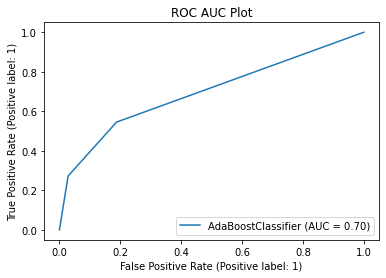

In [164]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# 
Final Accuracy is 88% and AUC score is 70%, which depicts that our model is working fairly well

# Saving the Ada Boost Classifier Model

In [165]:
filename='HR Analytics Project.pkl'
pickle.dump(grid, open(filename,'wb'))